<a href="https://colab.research.google.com/github/ShanRinna/DL3/blob/main/ANN%E5%88%86%E9%A1%9E%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('/content/Titanic_assignment_data_17.csv')
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,female,NaN,0,0,7.8792,Q,yes
1,1,male,28.0,0,0,26.5500,S,yes
2,3,female,28.0,1,1,14.4000,S,no
3,2,male,39.0,0,0,13.0000,S,no
4,3,male,22.0,0,0,8.0500,S,no
...,...,...,...,...,...,...,...,...
1042,2,female,28.0,0,0,13.0000,S,yes
1043,1,female,39.0,1,1,110.8833,C,yes
1044,3,male,NaN,0,0,8.0500,S,no
1045,1,female,31.0,0,0,134.5000,C,no


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 1.1 Easiest way to check data type and if there are any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1047 non-null   int64  
 1   Sex       1047 non-null   object 
 2   Age       795 non-null    float64
 3   SibSp     1047 non-null   int64  
 4   Parch     1047 non-null   int64  
 5   Fare      1046 non-null   float64
 6   Embarked  1047 non-null   object 
 7   Survived  1047 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 65.6+ KB


In [5]:
# 1.2 When using the describe function in default, pandas automatically selects the numerical columns
df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,1047.000000,795.000000,1047.000000,1047.000000,1046.000000
mean,2.305635,29.840252,0.504298,0.397326,32.974378
std,0.838940,14.248987,1.028156,0.853915,49.255956
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.387500
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# Change data type
df[['Pclass']]=df[['Pclass']].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1047 non-null   object 
 1   Sex       1047 non-null   object 
 2   Age       795 non-null    float64
 3   SibSp     1047 non-null   int64  
 4   Parch     1047 non-null   int64  
 5   Fare      1046 non-null   float64
 6   Embarked  1047 non-null   object 
 7   Survived  1047 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 65.6+ KB


In [ ]:
df.describe()

,Age,SibSp,Parch,Fare
count,795.000000,1047.000000,1047.000000,1046.000000
mean,29.840252,0.504298,0.397326,32.974378
std,14.248987,1.028156,0.853915,49.255956
min,1.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.387500
max,76.000000,8.000000,9.000000,512.329200


In [6]:
df.describe(include='all')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,1047.000000,1047,795.000000,1047.000000,1047.000000,1046.000000,1047,1047
unique,NaN,2,NaN,NaN,NaN,NaN,3,2
top,NaN,male,NaN,NaN,NaN,NaN,S,no
freq,NaN,674,NaN,NaN,NaN,NaN,735,661
mean,2.305635,NaN,29.840252,0.504298,0.397326,32.974378,NaN,NaN
std,0.838940,NaN,14.248987,1.028156,0.853915,49.255956,NaN,NaN
min,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,2.000000,NaN,21.000000,0.000000,0.000000,7.895800,NaN,NaN
50%,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,3.000000,NaN,39.000000,1.000000,0.000000,31.387500,NaN,NaN


In [7]:
print(df[['Pclass']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Embarked']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Survived']].value_counts(sort=True))

Pclass
3         577
1         257
2         213
dtype: int64
+-----------------------+
Sex   
male      674
female    373
dtype: int64
+-----------------------+
Embarked
S           735
C           213
Q            99
dtype: int64
+-----------------------+
Survived
no          661
yes         386
dtype: int64


In [8]:
new_df=df.dropna(axis=0, how='any')
new_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
1,1,male,28.0,0,0,26.5500,S,yes
2,3,female,28.0,1,1,14.4000,S,no
3,2,male,39.0,0,0,13.0000,S,no
4,3,male,22.0,0,0,8.0500,S,no
5,2,male,34.0,0,0,13.0000,S,yes
...,...,...,...,...,...,...,...,...
1041,1,male,30.0,0,0,27.7500,C,no
1042,2,female,28.0,0,0,13.0000,S,yes
1043,1,female,39.0,1,1,110.8833,C,yes
1045,1,female,31.0,0,0,134.5000,C,no


In [9]:
new_df[['Age','SibSp','Parch','Fare']].describe()

,Age,SibSp,Parch,Fare
count,795.000000,795.000000,795.000000,795.000000
mean,29.840252,0.527044,0.442767,37.432594
std,14.248987,0.918717,0.860661,53.712536
min,1.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,8.050000
50%,28.000000,0.000000,0.000000,16.100000
75%,39.000000,1.000000,1.000000,39.400000
max,76.000000,5.000000,6.000000,512.329200


In [10]:
print(new_df[['Pclass']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Embarked']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Survived']].value_counts(sort=True))

Pclass
3         379
1         223
2         193
dtype: int64
+-----------------------+
Sex   
male      487
female    308
dtype: int64
+-----------------------+
Embarked
S           604
C           155
Q            36
dtype: int64
+-----------------------+
Survived
no          479
yes         316
dtype: int64


In [ ]:
print('Pclass',new_df['Pclass'].unique())
print('Sex',new_df['Sex'].unique())
print('Embarked',new_df['Embarked'].unique())
print('Survived',new_df['Survived'].unique())

Pclass ['1' '3' '2']
Sex ['male' 'female']
Embarked ['S' 'C' 'Q']
Survived ['yes' 'no']


In [11]:
dummied_new_df=pd.get_dummies(new_df,columns=['Pclass','Sex','Embarked','Survived']) #one-hot encoding
dummied_new_df

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
1,28.0,0,0,26.5500,1,0,0,0,1,0,0,1,0,1
2,28.0,1,1,14.4000,0,0,1,1,0,0,0,1,1,0
3,39.0,0,0,13.0000,0,1,0,0,1,0,0,1,1,0
4,22.0,0,0,8.0500,0,0,1,0,1,0,0,1,1,0
5,34.0,0,0,13.0000,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,30.0,0,0,27.7500,1,0,0,0,1,1,0,0,1,0
1042,28.0,0,0,13.0000,0,1,0,1,0,0,0,1,0,1
1043,39.0,1,1,110.8833,1,0,0,1,0,1,0,0,0,1
1045,31.0,0,0,134.5000,1,0,0,1,0,1,0,0,1,0


In [14]:
# Export to CSV file Note: preset folder path is required
#dummied_new_df.to_csv('D:/data_analysis/PyExport/Titanic_demo_deleteNA.csv',index=False, header=True)
# Colab
dummied_new_df.to_csv('Titanic17_assignment_deleteNA.csv',index=False, header=True)
print('Export complete...')

Export complete...


In [15]:
#minimax scaling:不改變資料結構下改變使變數等距(0-1之間)
MMscaler=MinMaxScaler(feature_range=(0, 1))
scaling=MMscaler.fit_transform(dummied_new_df)
scaled_data=pd.DataFrame(data=scaling)
scaled_data.columns=['Age','SibsSp','Parch','Fare','Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Survived_no','Survived_yes']
scaled_data.head()

,Age,SibsSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,0.360000,0.0,0.000000,0.051822,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.360000,0.2,0.166667,0.028107,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.506667,0.0,0.000000,0.025374,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.280000,0.0,0.000000,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.440000,0.0,0.000000,0.025374,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [16]:
dummied_new_df.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
1,28.0,0,0,26.55,1,0,0,0,1,0,0,1,0,1
2,28.0,1,1,14.40,0,0,1,1,0,0,0,1,1,0
3,39.0,0,0,13.00,0,1,0,0,1,0,0,1,1,0
4,22.0,0,0,8.05,0,0,1,0,1,0,0,1,1,0
5,34.0,0,0,13.00,0,1,0,0,1,0,0,1,0,1


In [17]:
#set x (make prediction) with minimax
x=scaled_data.drop(['Survived_no','Survived_yes'],axis=1).copy()

#set y (want to predict)
y=scaled_data['Survived_yes'].copy()
y=y.astype(int)

In [18]:
#Split the data (split into 80% training data & 20% testing data) (lock seed)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4) #test:跨方式比較(KNN v.s logist), test:模型內(test內的validation)比較參數

In [19]:
from collections import Counter
print('y_train:',Counter(y_train))
print('------------------------------------')
print('y_test :',Counter(y_test))

y_train: Counter({0: 384, 1: 252})
------------------------------------
y_test : Counter({0: 95, 1: 64})


In [20]:
# Quick recap: Total of 12 features in the data set
x.head()

,Age,SibsSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.360000,0.0,0.000000,0.051822,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.360000,0.2,0.166667,0.028107,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.506667,0.0,0.000000,0.025374,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.280000,0.0,0.000000,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.440000,0.0,0.000000,0.025374,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
input_features=x.shape[1]
print('Amount of features:',input_features)

Amount of features: 12


In [78]:
# 6.1 Create the model
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=24, input_dim=12, activation='relu'))

# 6.3 Add second hidden layer
model.add(Dense(units=48, activation='relu'))

# 6.4 Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# 6.5 Compile the defined Net
a=0.01
b=0.05
c=0.1
d=0.05
e=0.5
f=0.9
opt=SGD(learning_rate=b,momentum=d)   #改為改learing rate 和 momentum
#opt=Adam(learning_rate=0.01,beta_1=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 48)                1200      
                                                                 
 dense_2 (Dense)             (None, 1)                 49        
                                                                 
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Important
a=32
b=48
c=64


x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=100) #每次調random=

# 7.1 Store in the history for more useful information
history=model.fit(x_training, y_training, epochs=100, batch_size=a,verbose=1,validation_data=(x_validation, y_validation)) #epochs=100 or 200,batch(建議當主調)=PPT


Epoch 1/100
16/16 [==============================] - 1s 26ms/step - loss: 0.6943 - accuracy: 0.5118 - val_loss: 0.6611 - val_accuracy: 0.6406
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6599 - accuracy: 0.5965 - val_loss: 0.6286 - val_accuracy: 0.6641
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6392 - accuracy: 0.5984 - val_loss: 0.6048 - val_accuracy: 0.6797
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6215 - accuracy: 0.6378 - val_loss: 0.5850 - val_accuracy: 0.7734
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6057 - accuracy: 0.6929 - val_loss: 0.5641 - val_accuracy: 0.8047
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5915 - accuracy: 0.7343 - val_loss: 0.5456 - val_accuracy: 0.8125
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5806 - accuracy: 0.7343 - val_loss: 0.5319 - val_accuracy: 0.8125
Epoch 8/100


In [80]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

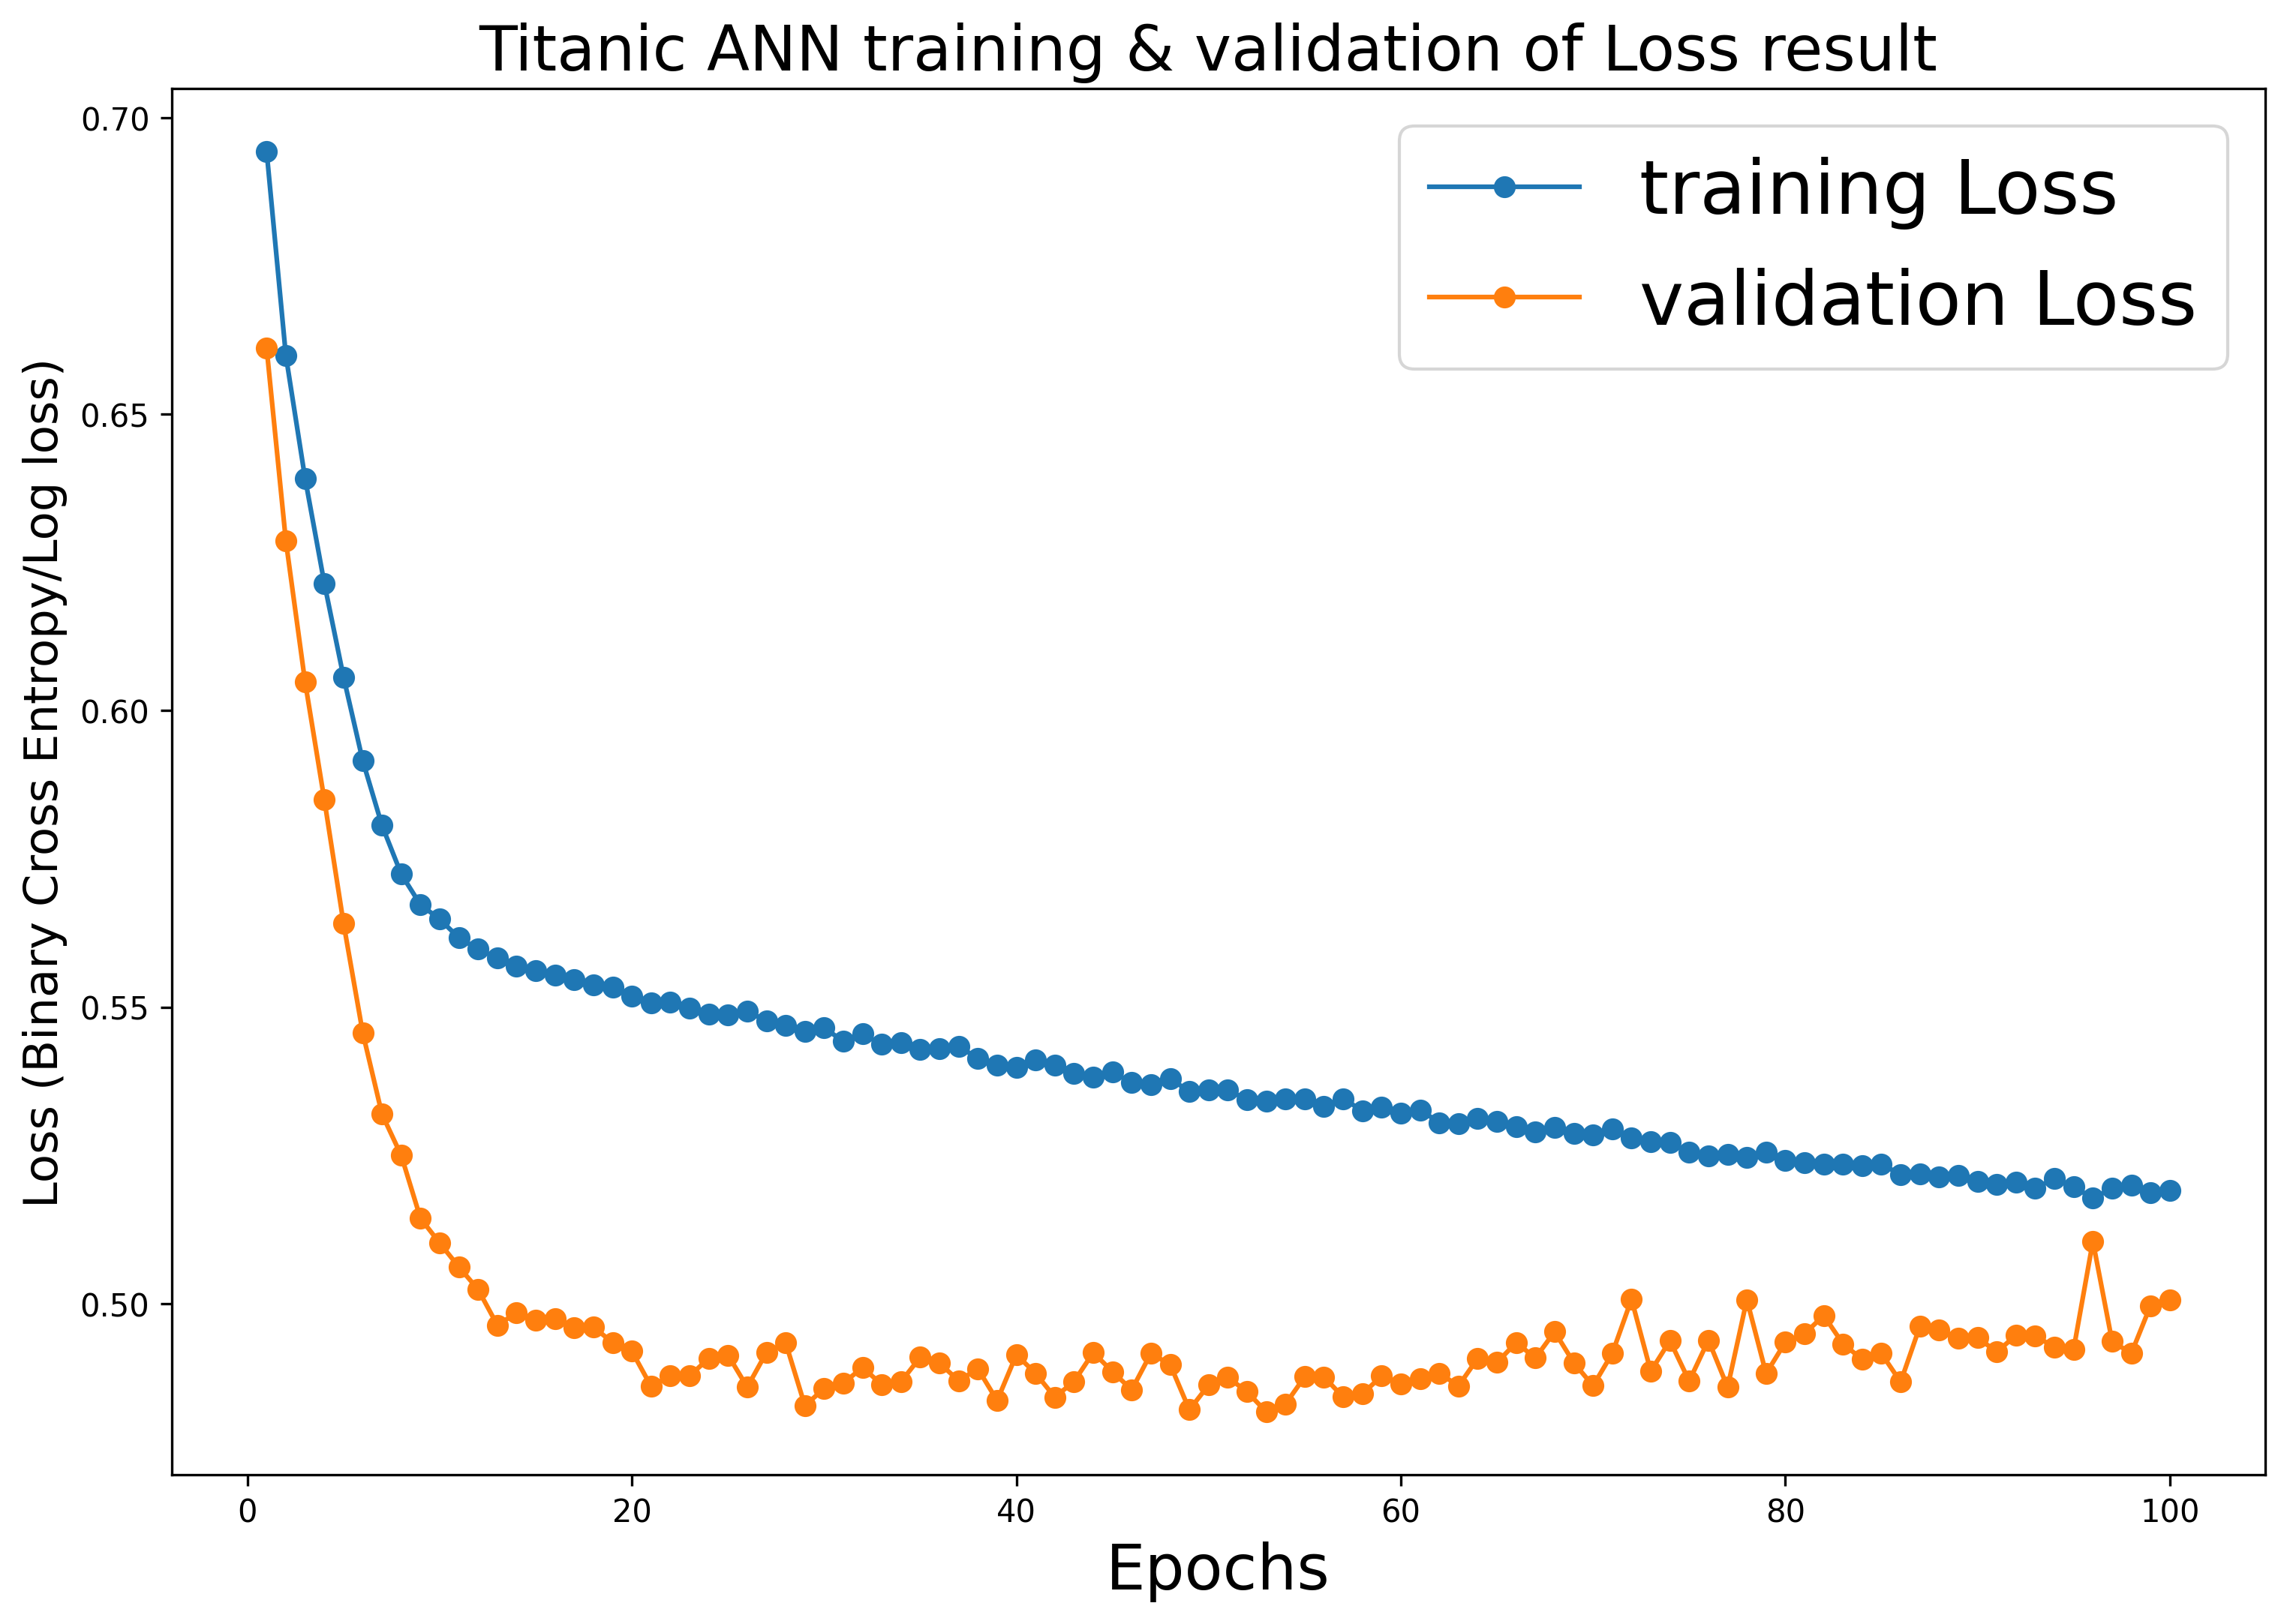

In [81]:
# 7.2 Plot the history of training and validation #平穩為收斂，training評估以loss為基準
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,8),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Binary Cross Entropy/Log loss)',fontsize=15)
plt.title('Titanic ANN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

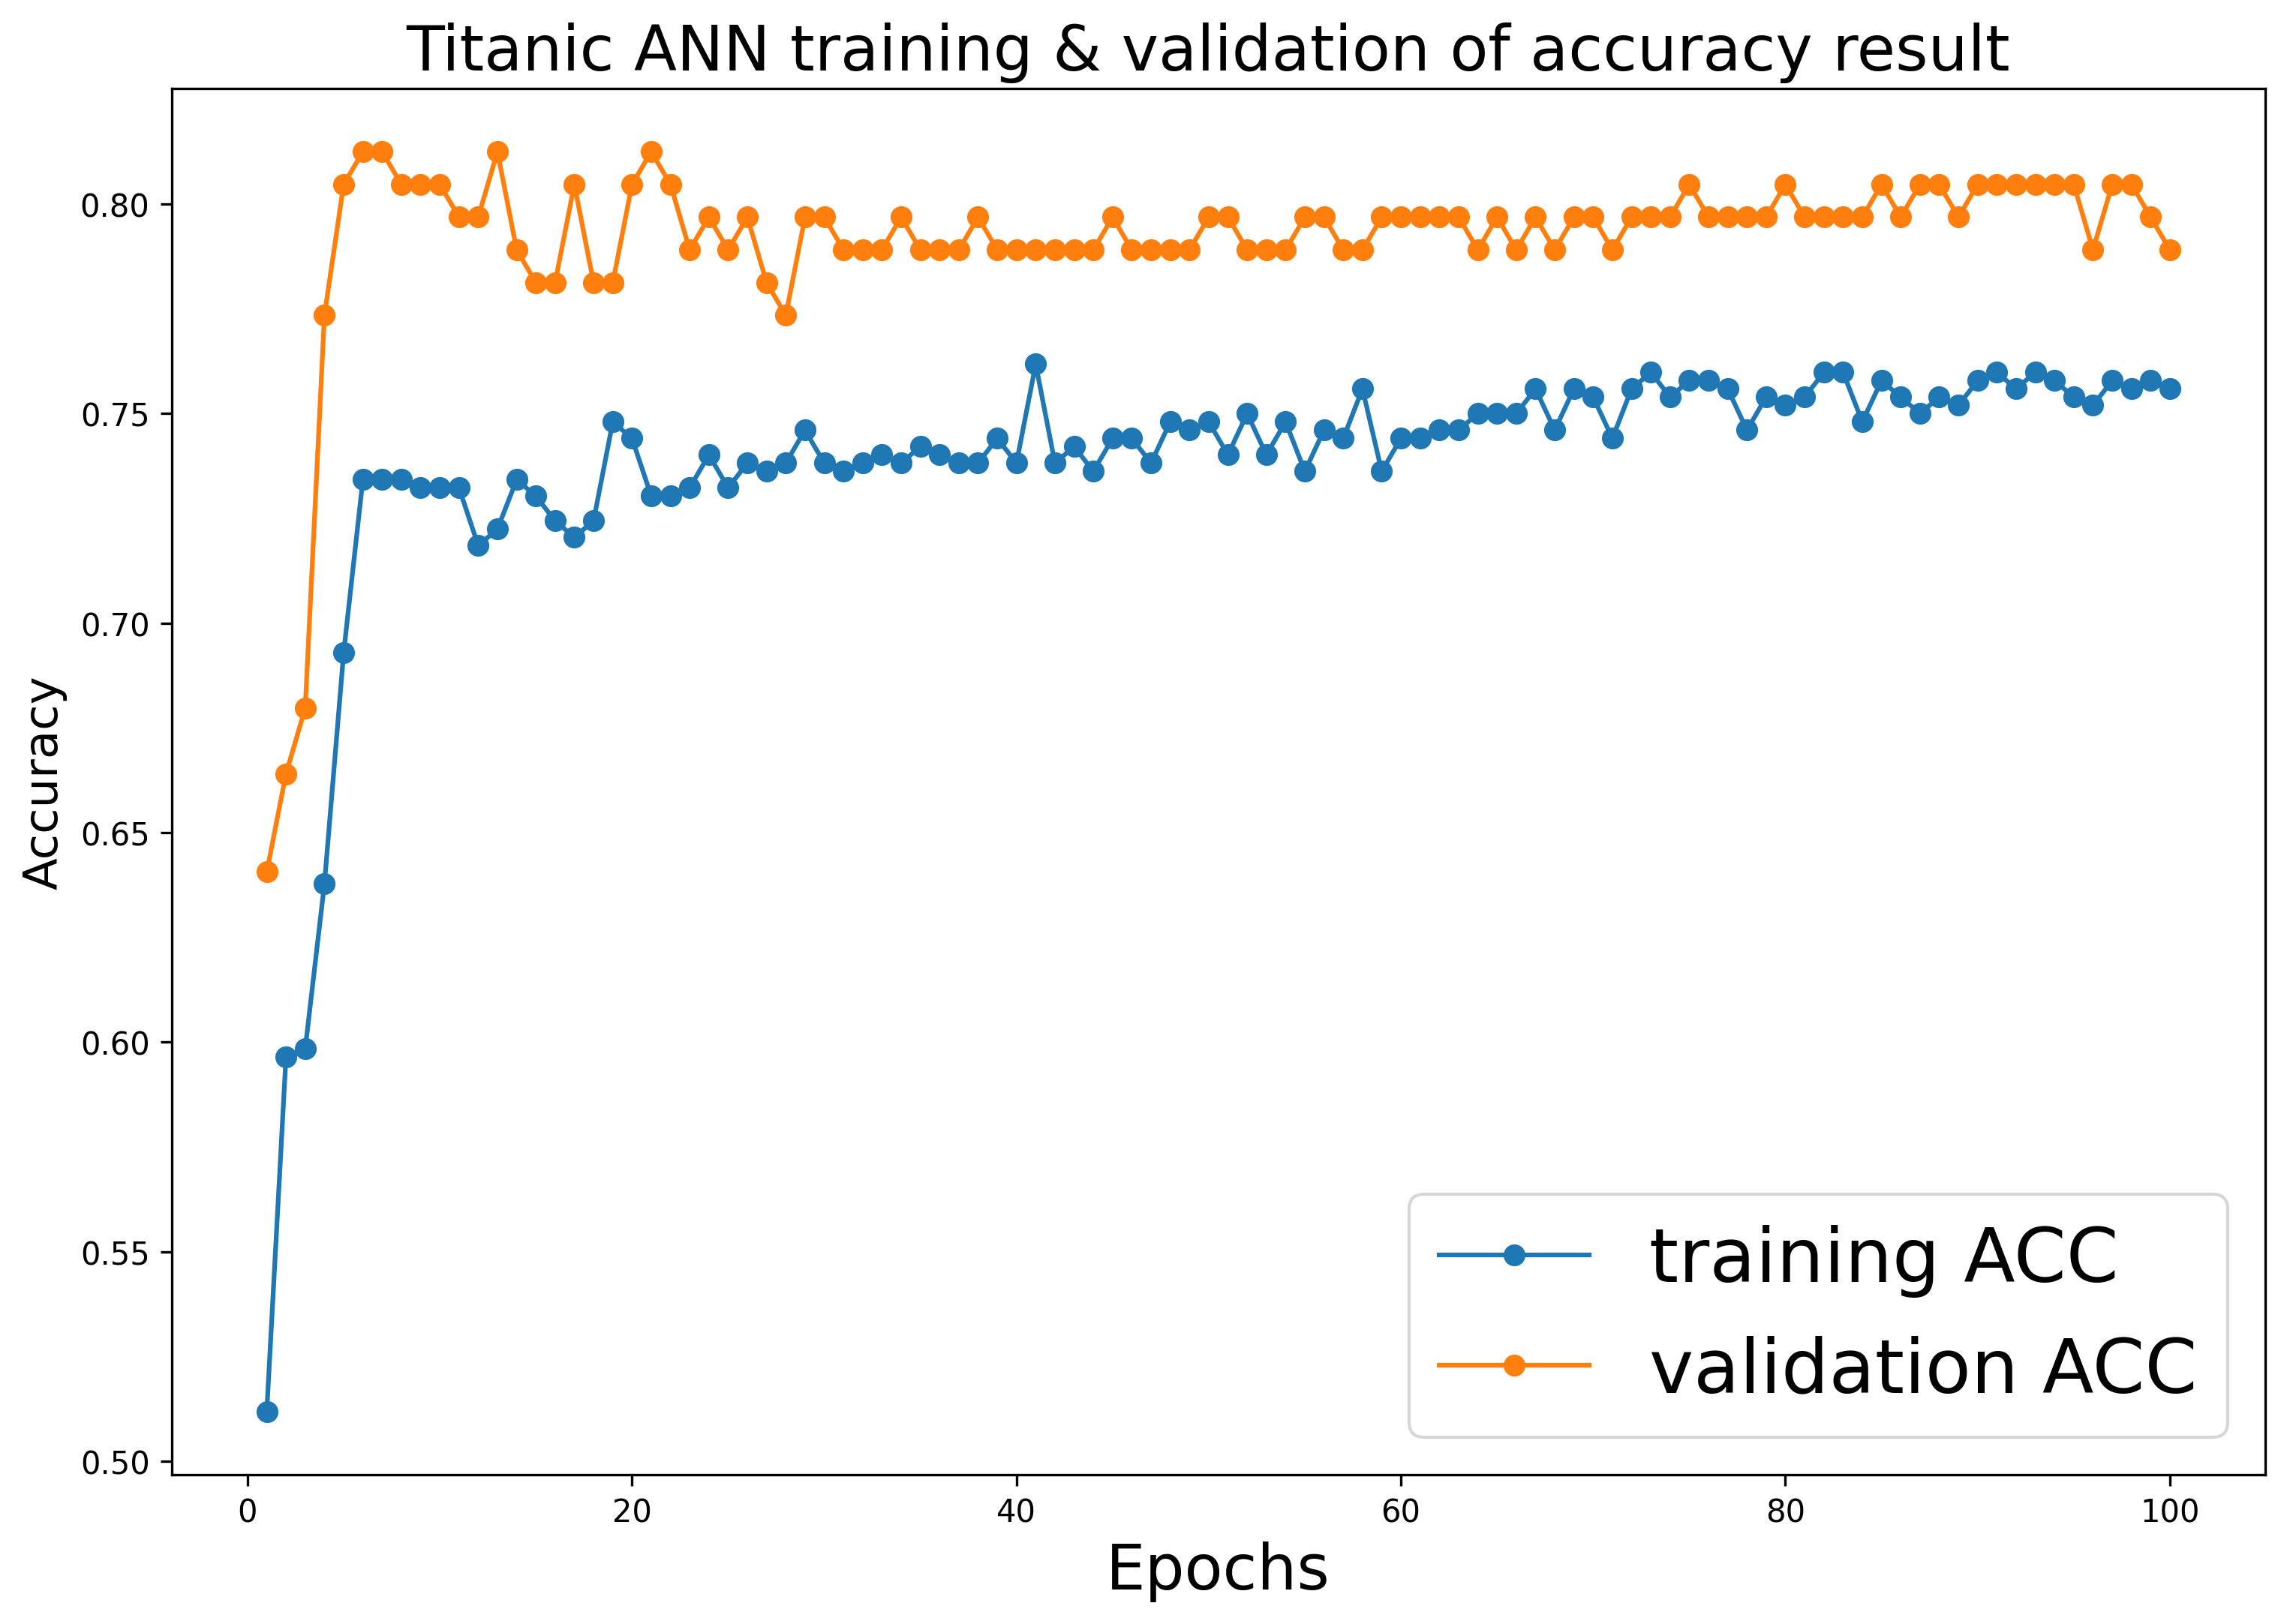

In [82]:
# 7.2 Plot the history of training and validation 
training_acc_values=modeling_result['accuracy']
val_acc_values=modeling_result['val_accuracy']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(12,8),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=15)
plt.title('Titanic ANN training & validation of accuracy result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='o',label='training ACC')
plt.plot(epochs, val_acc_values,marker='o',label='validation ACC')
plt.legend(loc=4,fontsize=24)
plt.show()

In [84]:
clear.clear_session()
model=Sequential()

# 6.2 Add input layer & first hidden layer
model.add(Dense(units=24, input_dim=12, activation='relu'))

# 6.3 Add second hidden layer
model.add(Dense(units=48, activation='relu'))

# 6.4 Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# 6.5 Compile the defined Net
opt=SGD(learning_rate=0.05,momentum=0.05)   #改為改learin rate 和 momentum
#opt=Adam(learning_rate=0.001,beta_1=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 48)                1200      
                                                                 
 dense_2 (Dense)             (None, 1)                 49        
                                                                 
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


In [85]:
# Important
x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=100) #每次調random=

# 7.1 Store in the history for more useful information
history=model.fit(x_training, y_training, epochs=100, batch_size=32,verbose=1,validation_data=(x_validation, y_validation)) #epochs=100 or 200,batch(建議當主調)=PPT
#依照最後Val的epoch為該次val之結果

Epoch 1/100
16/16 [==============================] - 1s 24ms/step - loss: 0.6648 - accuracy: 0.6122 - val_loss: 0.6406 - val_accuracy: 0.6875
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6405 - accuracy: 0.6476 - val_loss: 0.6151 - val_accuracy: 0.7188
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6246 - accuracy: 0.6516 - val_loss: 0.5968 - val_accuracy: 0.7344
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6110 - accuracy: 0.7067 - val_loss: 0.5797 - val_accuracy: 0.7812
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5993 - accuracy: 0.7224 - val_loss: 0.5678 - val_accuracy: 0.8047
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5905 - accuracy: 0.7283 - val_loss: 0.5601 - val_accuracy: 0.7812
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5838 - accuracy: 0.7303 - val_loss: 0.5496 - val_accuracy: 0.7969
Epoch 8/100


In [86]:
# 7.3 Save the trained model
#model.save('D:/data_analysis/PyExport/titanic_ANN_trained_model.h5')
# Colab
model.save('D:/data_analysis/PyExport/titanic_ANN_trained_model.h5')
print('Model has been saved...')

Model has been saved...


In [87]:
# 7.4 Restore the saved model for testing
#ANN_model=keras.models.load_model('D:/data_analysis/PyExport/titanic_ANN_trained_model.h5')
# Colab
ANN_model=keras.models.load_model('D:/data_analysis/PyExport/titanic_ANN_trained_model.h5')
print('Model successfully loaded...')

Model successfully loaded...


In [88]:
# 8.1 Make prediction 
prediction=ANN_model.predict_on_batch(x_test) #分類問題產出非0,1，算概率為某class，所以是0-1之間值
prediction

array([[0.16328403],
       [0.33664423],
       [0.15909468],
       [0.47438478],
       [0.74543124],
       [0.10258947],
       [0.80678236],
       [0.80829066],
       [0.42535764],
       [0.43969366],
       [0.6602823 ],
       [0.30233458],
       [0.6868532 ],
       [0.1360634 ],
       [0.18927081],
       [0.18404862],
       [0.05352729],
       [0.14132278],
       [0.16829373],
       [0.34732893],
       [0.14396223],
       [0.26738152],
       [0.18461992],
       [0.14900275],
       [0.76098543],
       [0.85480565],
       [0.849199  ],
       [0.3452567 ],
       [0.8380533 ],
       [0.184138  ],
       [0.80696213],
       [0.64532334],
       [0.10273934],
       [0.35599077],
       [0.14004357],
       [0.3250501 ],
       [0.7021053 ],
       [0.782528  ],
       [0.13907997],
       [0.1466105 ],
       [0.47855994],
       [0.23197784],
       [0.15909468],
       [0.39239496],
       [0.29664108],
       [0.41013372],
       [0.22079416],
       [0.137

In [89]:
# 8.2 Transform the predictions to 0 and 1 
testing_prediction=(ANN_model.predict_on_batch(x_test) >= 0.5).astype('int')
testing_prediction #######>=0.5 =class(1)

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
    

In [90]:
# 8.3 Calculating the mertics
testing_acc=accuracy_score(y_test,testing_prediction)
testing_f1s=f1_score(y_test,testing_prediction,pos_label=1)
testing_pre=precision_score(y_test,testing_prediction,pos_label=1)
testing_sen=sensitivity_score(y_test,testing_prediction,pos_label=1)
testing_spe=specificity_score(y_test,testing_prediction,pos_label=1)
testing_cm=confusion_matrix(y_test,testing_prediction)
print('Testing result:')
print('Testing ACC:',round(testing_acc*100,2))
print('Testing f1s:',round(testing_f1s*100,2))
print('Testing pre:',round(testing_pre*100,2))
print('Testing sen:',round(testing_sen*100,2))
print('Testing spe:',round(testing_spe*100,2))
print('')
print('Testing confusion matrix:')
print(testing_cm)

Testing result:
Testing ACC: 72.96
Testing f1s: 61.26
Testing pre: 72.34
Testing sen: 53.12
Testing spe: 86.32

Testing confusion matrix:
[[82 13]
 [30 34]]


In [91]:
# Tip: Quick testing with the metrics set for the model by using evaluate function
ANN_model.evaluate(x_test,y_test,batch_size=32,verbose=1)

5/5 [==============================] - 0s 3ms/step - loss: 0.5699 - accuracy: 0.7296


[0.5698932409286499, 0.7295597195625305]